In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.ensemble import IsolationForest

In [18]:
df = pd.read_csv("Motor_Vibrations.csv")

In [19]:
joblib_file = "isolation_forest_model.pkl"
loaded_model = joblib.load(joblib_file)

In [29]:


def create_resampled_dataset(df, month, day):

    from sklearn.ensemble import IsolationForest



    if not pd.api.types.is_datetime64_any_dtype(df['UPD_TIME']):
        df['UPD_TIME'] = pd.to_datetime(df['UPD_TIME'])
    
    df_filtered = df[(df['UPD_TIME'].dt.month == month) & (df['UPD_TIME'].dt.day == day)]
    
    df_filtered.set_index('UPD_TIME', inplace=True)
    
    data = df_filtered.resample('1S').mean()  # Use '1T' for 1-minute intervals if needed
    
    data = data.interpolate(method='time')

    model = IsolationForest(random_state = 0, contamination = float(0.01))
    model.fit(data[['CF2_MNDE_V_VBT']])

    data['score'] = model.decision_function(data[['CF2_MNDE_V_VBT']])
    data['anomaly'] = model.predict(data[['CF2_MNDE_V_VBT']])
    
    
    outliers = data.loc[data['anomaly'] == -1]
    outlier_index = list(outliers.index)

    plt.figure(figsize = (16, 8))
    plt.plot(data['CF2_MNDE_V_VBT'], marker = '.')
    plt.plot(outliers['CF2_MNDE_V_VBT'], 'o', color = 'red', label = 'outlier')
    plt.title('Isolation Forest outcome with 15% contamination (resampled data)')

    plt.ylabel('CF2_MNDE_V_VBT')
    plt.legend()


C:\Users\hrish\AppData\Local\Temp\ipykernel_19464\3733354520.py:14: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  data = df_filtered.resample('1S').mean()  # Use '1T' for 1-minute intervals if needed


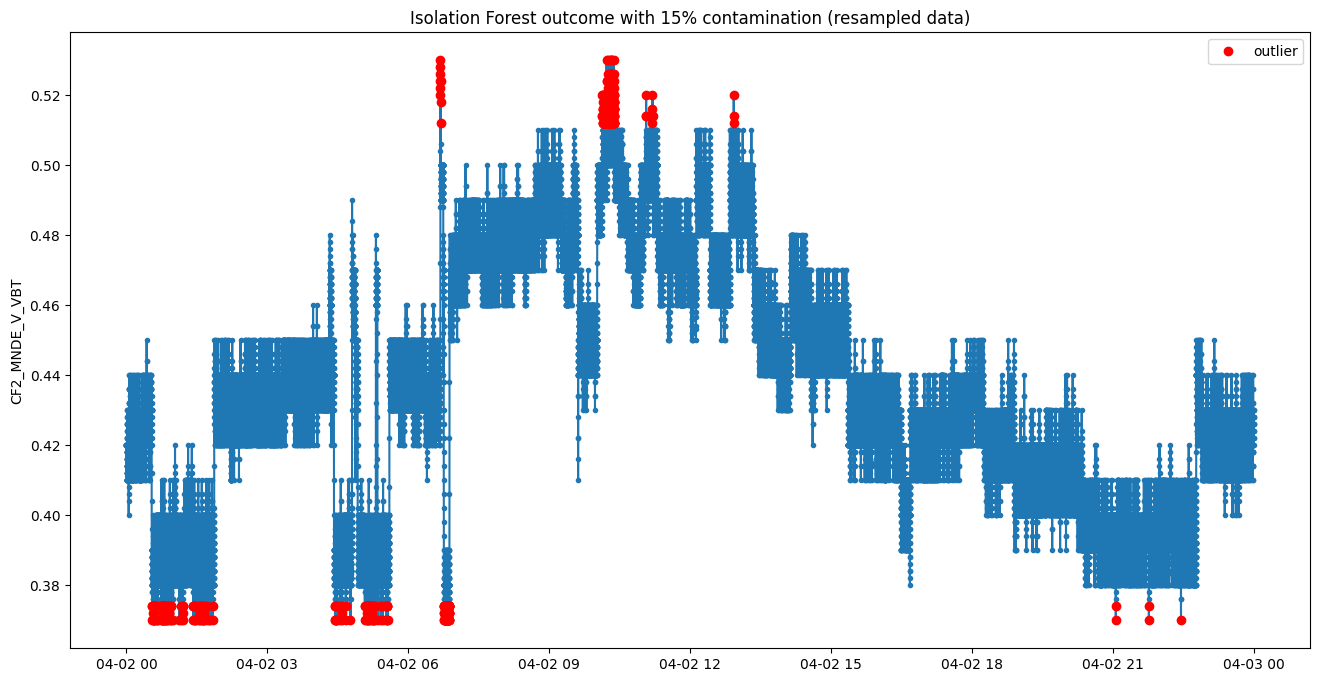

In [33]:
data = create_resampled_dataset(df,4,2)